In [16]:
import matplotlib.pyplot as plt
import os

from sqlcollect import getTable
from seismicZones import query


In [17]:
# ---------------------------SETUP AND COLLECTION OF QUAKES------------------------------------#
# Which region do you want to analyze ?
region = input('Input region : vrancea / romania / california / italy / japan : ')

# The side of the cubes that you split the region in 
#side = int(input('Input side of the cube split in km 5 / 10 / 20 : '))

# The condition for the SQL collection
sql_query= query(region)

# Magnitude windows for the condition that collects the database through mySQL
magMin = int(input('Input minimum magnitude: '))
magMax = int(input('Input maximum magnitude: '))
# Add to condition
sql_query+=f" AND magnitude>={magMin} AND magnitude<={magMax}"

print(sql_query)

# Collect the earthquakes
quakes = getTable(sql_query)
quakes.head()

SELECT * FROM italy WHERE datetime>='1986-01-01 00:00:00' AND depth>=0 AND magnitude>=2 AND magnitude<=10


/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,datetime,latitude,longitude,depth,magnitude,magtype
0,1986-01-01 17:22:52.570,43.651,10.520,20.1,2.2,Md
1,1986-01-01 17:52:28.300,38.519,22.184,10.0,4.0,M
2,1986-01-01 19:18:30.230,37.740,15.147,5.0,3.2,Md
3,1986-01-03 04:04:22.360,42.417,20.152,10.0,3.2,M
4,1986-01-03 07:22:58.890,42.211,20.301,10.0,3.2,M


## VISUALIZATION

In [19]:
#import ipympl

from visualization import visualize

In [22]:
# ----------------------------------------------------------------------------------------------#

# ----------------------------------2D MAP PROJECTION----------------------------------------------#
# Choose if you wish to include a projection of the region's map as 2D image under the 3D scatterplot
# You require png images with the maps for this to" work
withMap = input('Do you wish the scatter to have a projection of the region map ? True / False : ')

<Figure size 720x720 with 0 Axes>

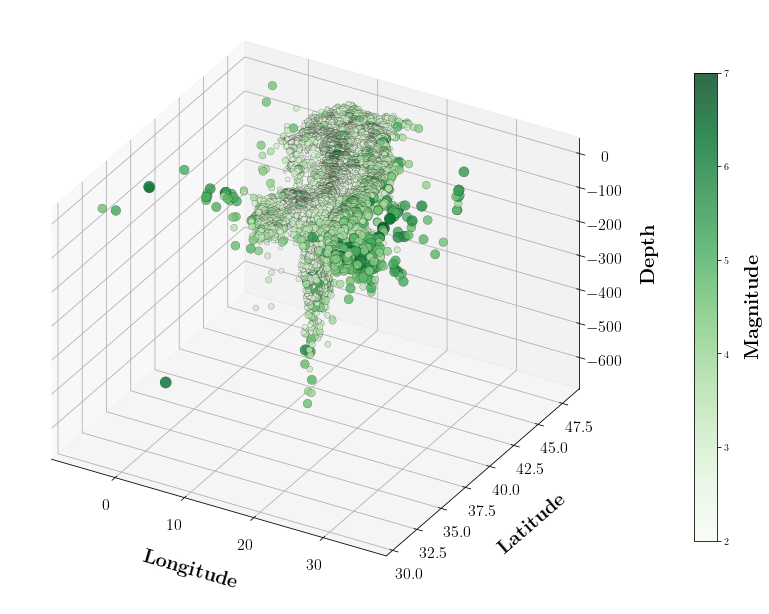

In [23]:
# %matplotlib widget

plt.figure(figsize=(10,10))
ax = visualize(quakes,region,withMap)



if not os.path.exists(f'./results/{region}/visualization'):
    os.makedirs(f'results/{region}/visualization')


if withMap == 'True':
    plt.savefig(f'./results/{region}/visualization/{region}_map.png', bbox_inches = "tight" )
    #plt.savefig(f'./results/{region}/visualization/{region}_maptest.svg', bbox_inches = "tight" )
elif withMap == 'False':
    plt.savefig(f'./results/{region}/visualization/{region}_nomap.png', bbox_inches = "tight")
    #plt.savefig(f'./results/{region}/visualization/{region}_nomaptest.svg', bbox_inches = "tight" )

## SPLIT REGION IN CUBES

In [7]:
from cubes import makeCubes

In [8]:
quakes

,datetime,latitude,longitude,depth,magnitude,magtype
0,1984-01-06 00:40:38.080,34.008,-117.224,12.0,2.56,l
1,1984-01-06 05:00:12.850,35.957,-118.337,4.2,3.25,l
2,1984-01-06 06:41:24.330,36.152,-118.008,-0.4,2.86,l
3,1984-01-08 11:24:14.180,36.776,-119.924,5.5,3.00,l
4,1984-01-01 18:27:55.230,36.364,-120.395,18.2,3.29,l
...,...,...,...,...,...,...
61053,1998-06-17 22:49:01.090,33.670,-117.009,-0.7,2.22,l
61054,1998-06-18 21:57:07.390,34.486,-116.453,1.3,2.56,l
61055,1998-06-18 22:46:26.180,33.669,-117.020,-0.7,2.09,l
61056,1998-06-19 11:13:44.860,33.661,-116.778,11.3,2.31,l


In [9]:
quakes = makeCubes(quakes,region)

In [10]:
quakes.head()

,datetime,latitude,longitude,depth,magnitude,magtype,xLatitude,yLongitude,zDepth,cubeIndex,cubeLatitude,cubeLongitude,cubeDepth
0,1984-01-06 00:40:38.080,34.008,-117.224,12.0,2.56,l,45,89,3,45893,34.0045,-117.2456,10.2
1,1984-01-06 05:00:12.850,35.957,-118.337,4.2,3.25,l,88,68,2,88682,35.9414,-118.3626,5.2
2,1984-01-06 06:41:24.330,36.152,-118.008,-0.4,2.86,l,93,75,1,93751,36.1667,-117.9902,0.2
3,1984-01-08 11:24:14.180,36.776,-119.924,5.5,3.00,l,107,39,2,107392,36.7973,-119.9051,5.2
4,1984-01-01 18:27:55.230,36.364,-120.395,18.2,3.29,l,97,30,5,97305,36.3468,-120.3839,20.2


## NETWORK CREATION

In [26]:
import networkx as nx
from graph import graphCreation

In [27]:
quakesGraph = graphCreation(quakes)

KeyboardInterrupt: 